# Face Recognition APP

Install usefull libraries : 
1. Labelme : Application pour permettre l'annotation d'images
2. Open CV
3. Albumentations : Bibliothèque pour l'augmentation des données dans la vision par ordinateur.

In [ ]:
!pip install opencv-python tensorflow labelme albumentations matplotlib 

In [4]:
import os 
import time
import cv2
import uuid

## Récupération des données 

**Code utile pour récupérer les données de la web cam utilisant open cv**

In [5]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [9]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [10]:
!labelme # Ouvrir l'application label me, ne pas oublier de changer le repertoire pour les outputs 


2024-08-01 22:01:16,802 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\fares\.labelmerc


## Revu du jeu de données et construction d'une fonction pour charger les images 


In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus : 
    tf.config.experimental.set_memory_growth(gpu,True)

### Charger les données en un tf data pipeline

In [22]:
# Créer un jeu de données en spécifiant le dossier comportant nos images
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle = True)

In [23]:
# Permet de parcourir le tenseur images
images.as_numpy_iterator().next()

b'data\\images\\65b69a4d-5040-11ef-a71f-8b544a84180a.jpg'

In [24]:
def load_image(x) : 
    byte_img = tf.io.read_file(x) #io pour input/output, module pour écrire, lire  ou charger fichier. byte_img est un tenseur d'octet
    img = tf.io.decode_jpeg(byte_img) #décoder la suite d'octet en une image 
    return img
    

In [25]:
images = images.map(load_image) # Permet de passer la fonction sur toutes les images 

In [26]:
images.as_numpy_iterator().next() 

array([[[ 91,  96,  76],
        [ 91,  96,  76],
        [ 90,  95,  73],
        ...,
        [ 87,  94,  76],
        [ 90,  95,  75],
        [ 91,  96,  76]],

       [[ 91,  96,  76],
        [ 91,  96,  76],
        [ 90,  95,  73],
        ...,
        [ 85,  93,  72],
        [ 88,  93,  73],
        [ 89,  94,  74]],

       [[ 92,  95,  74],
        [ 92,  95,  74],
        [ 91,  94,  73],
        ...,
        [ 85,  93,  70],
        [ 86,  94,  71],
        [ 86,  94,  71]],

       ...,

       [[117, 129, 119],
        [118, 130, 120],
        [119, 130, 124],
        ...,
        [121, 132, 124],
        [121, 131, 123],
        [119, 130, 122]],

       [[117, 128, 122],
        [117, 128, 122],
        [118, 128, 127],
        ...,
        [120, 133, 124],
        [120, 131, 123],
        [118, 131, 121]],

       [[116, 127, 123],
        [117, 128, 124],
        [118, 128, 129],
        ...,
        [118, 131, 122],
        [118, 131, 121],
        [116, 129, 119]]

### Visualiser nos images

In [27]:
images_generator = images.batch(4).as_numpy_iterator() #batch permet de prendre plusieurs données en même temps

In [28]:
plot_images = images_generator.next()

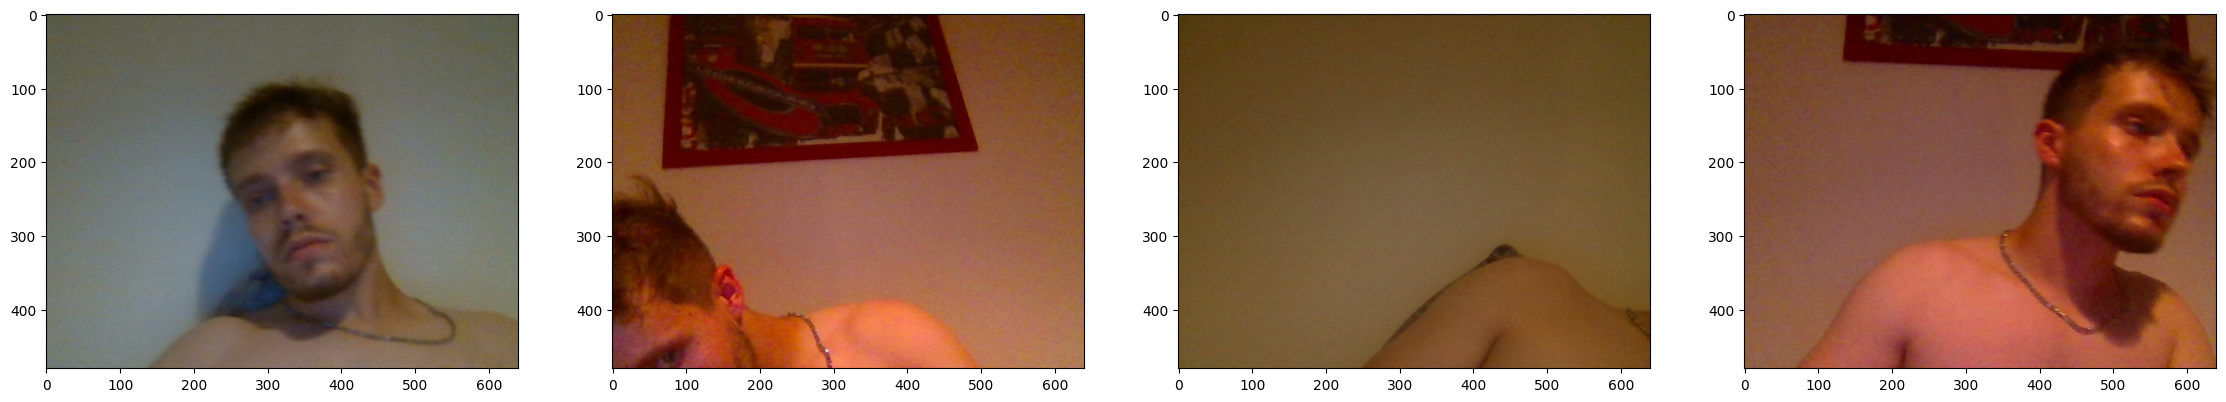

In [29]:
fig, ax = plt.subplots(ncols = 4, figsize = (28,20)) # Créer une figure avec un tableau d'axes de 4 colonnes
for idx, image in enumerate(plot_images)  : 
    ax[idx].imshow(image) # Place l'image 1 sur l'axe 0 etc...
plt.show()
    